# Exploring Sleep Quality in Relation to Disorders

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df.shape

(374, 13)

In [5]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["Occupation"].unique()

In [ ]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [14]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df.isna().sum(axis=0)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## Data Exploration

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.groupby("Sleep Disorder").mean(numeric_only = True)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Sleep Disorder,,,,,,,,
Insomnia,216.272727,43.519481,6.589610,6.532468,46.818182,5.870130,70.467532,5901.298701
None,146.972603,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037
Sleep Apnea,272.884615,49.705128,7.032051,7.205128,74.794872,5.666667,73.089744,7619.230769


## Univariate Analysis

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

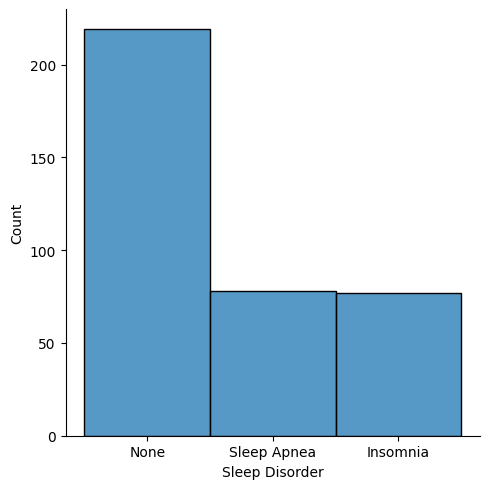

In [ ]:
# Studying Distribution of Sleep Disorders
sns.displot(df, x="Sleep Disorder")
df["Sleep Disorder"].value_counts()

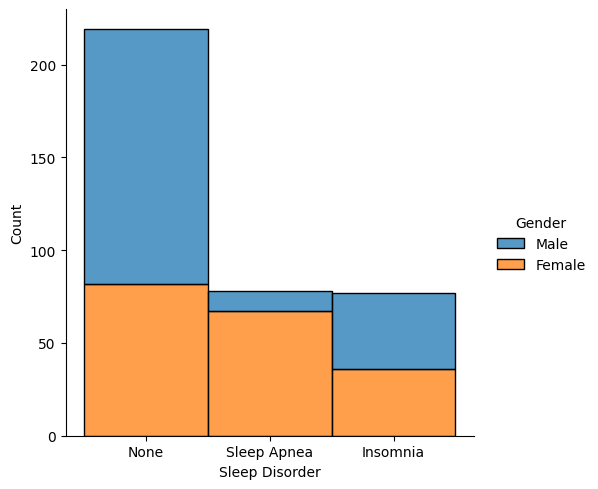

In [ ]:
# Distribution of Sleep Disorders by Gender
sns.displot(df, x="Sleep Disorder", hue="Gender", multiple="stack")

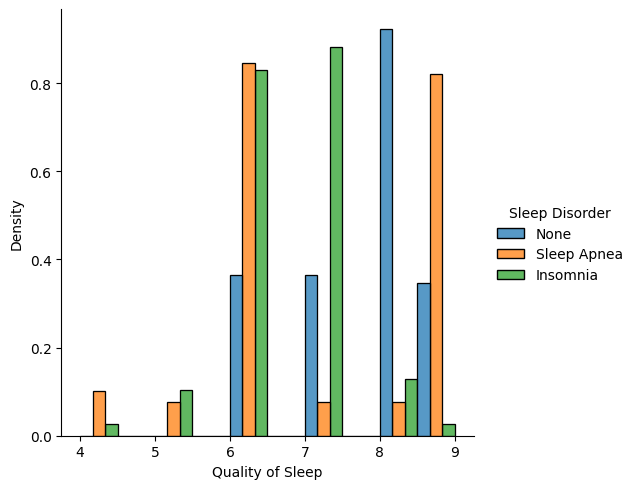

In [ ]:
# Distribution of Quality of Sleep by Sleep Disorder
sns.displot(df, x="Quality of Sleep", hue="Sleep Disorder", multiple="dodge", stat="density", common_norm=False)

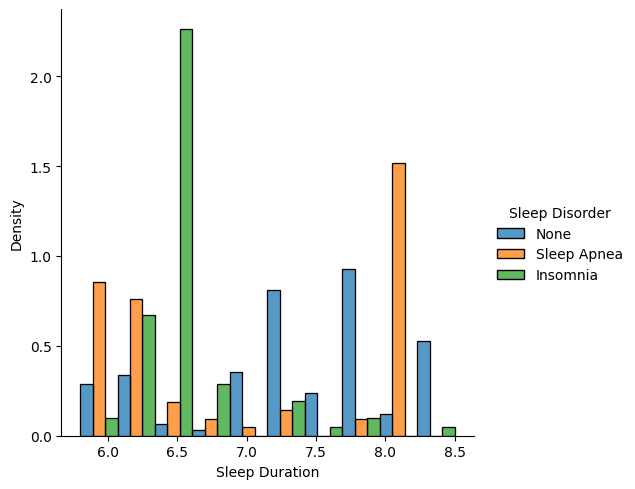

In [ ]:
# Distribution of Sleep Duration by Sleep Disorder
sns.displot(df, x="Sleep Duration", hue="Sleep Disorder", multiple="dodge", stat="density", common_norm=False)

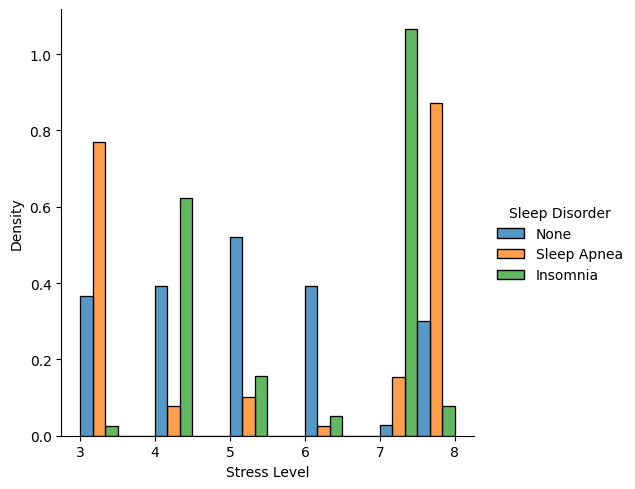

In [15]:
# Distribution of Stress Level by Sleep Disorder
sns.displot(df, x="Stress Level", hue="Sleep Disorder", multiple="dodge", stat="density", common_norm=False)

## Multivariate Analysis

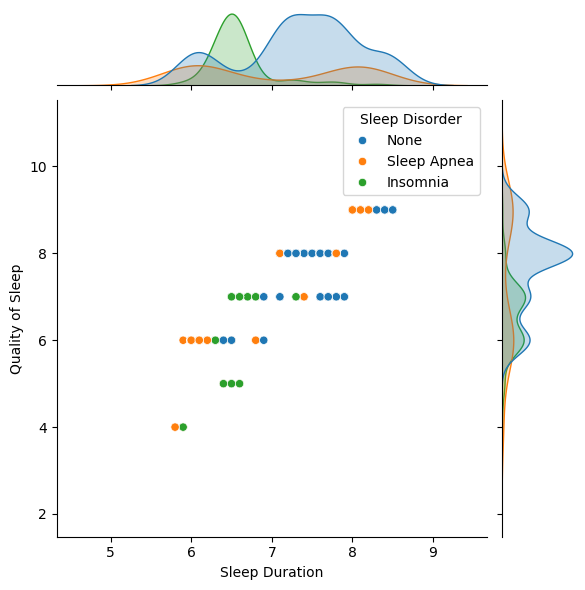

In [16]:
sns.jointplot(data = df, x = 'Sleep Duration', y = 'Quality of Sleep', hue = "Sleep Disorder")

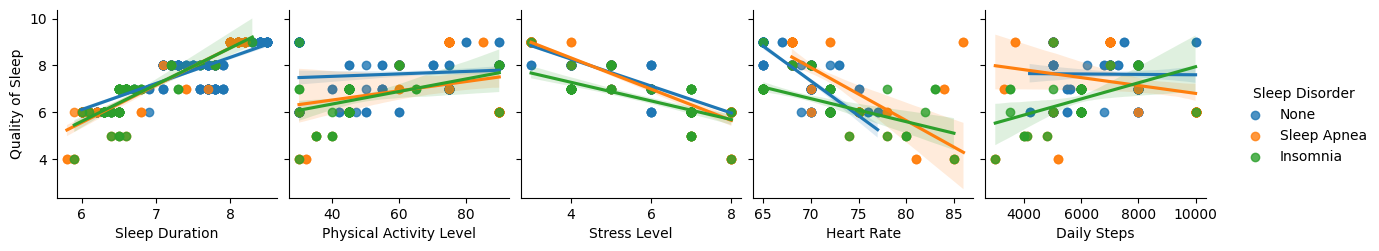

In [17]:
# sns.lmplot(data = df, x = 'Sleep Duration', y = 'Quality of Sleep', hue = "Sleep Disorder")
# Extending Linear Model Plot to multiple numerical variables of interest
sns.pairplot(df, x_vars=["Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"], y_vars=["Quality of Sleep"],
             hue="Sleep Disorder", kind="reg")
# Sleep disorder seems to have the most prominent effects on sleep duration, physical activity level, and daily steps
# Especially for daily steps, in which sleep quality remains constnat in spite of steps but decreases for sleep apnea and increases for insomnia

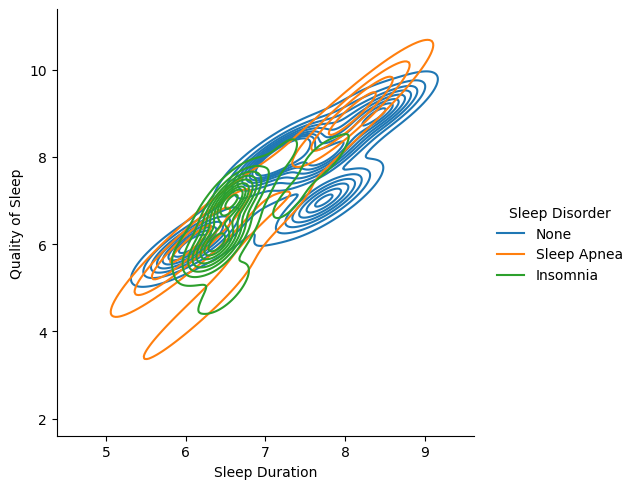

In [18]:
# Analyzing Quality of Sleep in Relation to Sleep Duration, Faceted by Sleep Disorder
sns.displot(df, x="Sleep Duration", y="Quality of Sleep", hue="Sleep Disorder", kind="kde")

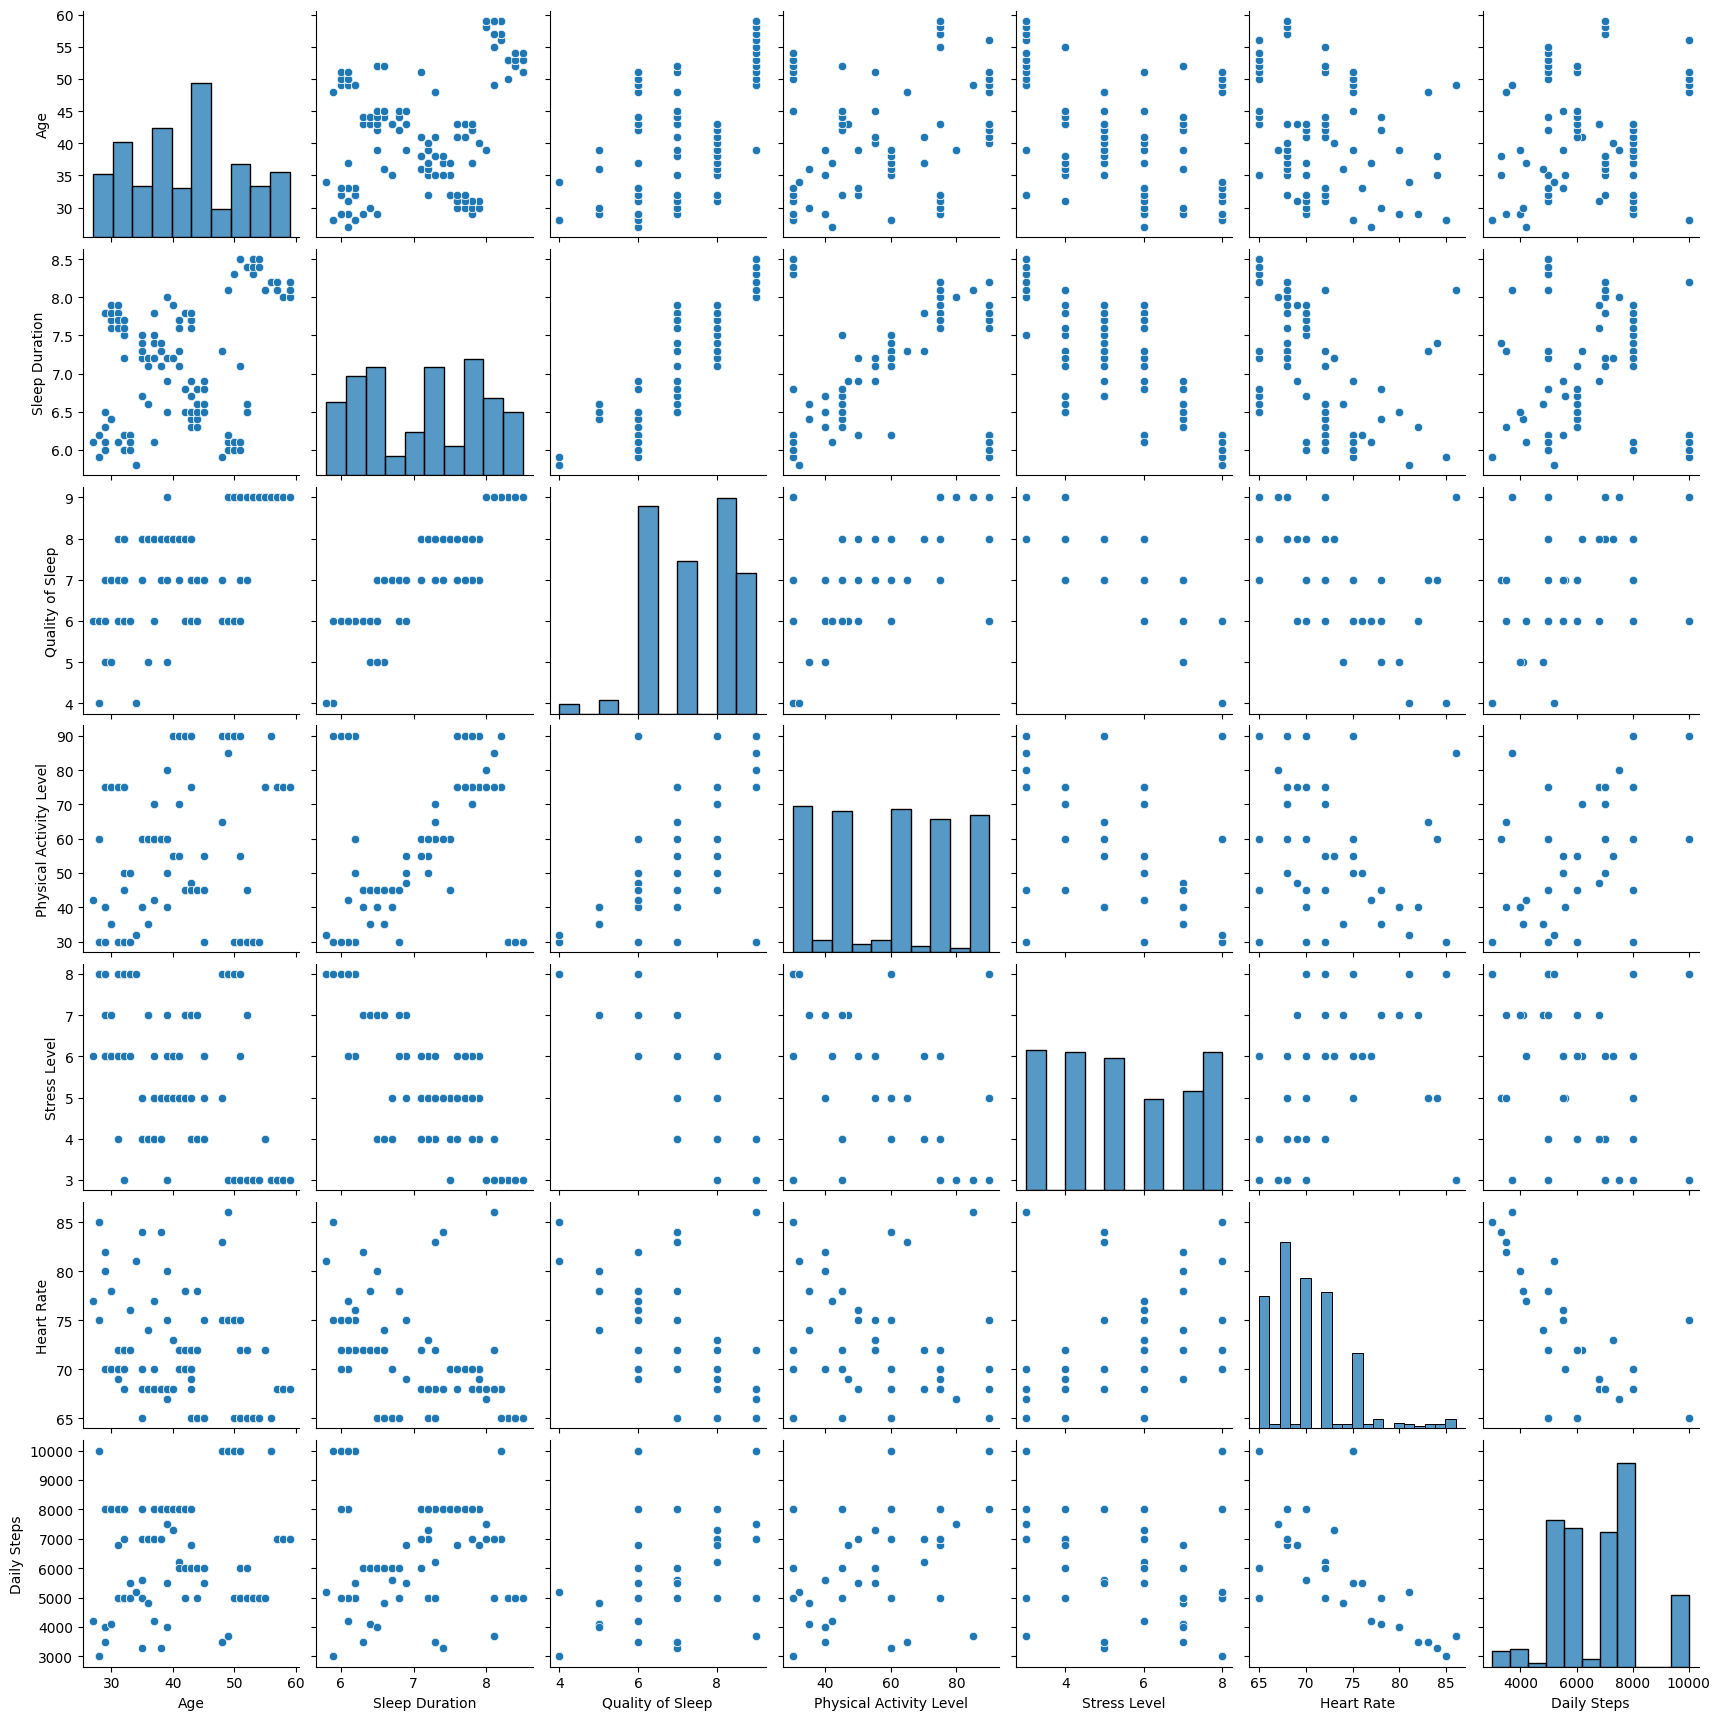

In [20]:
sns.pairplot(df.drop(columns = "Person ID", axis = 1))

<Axes: >

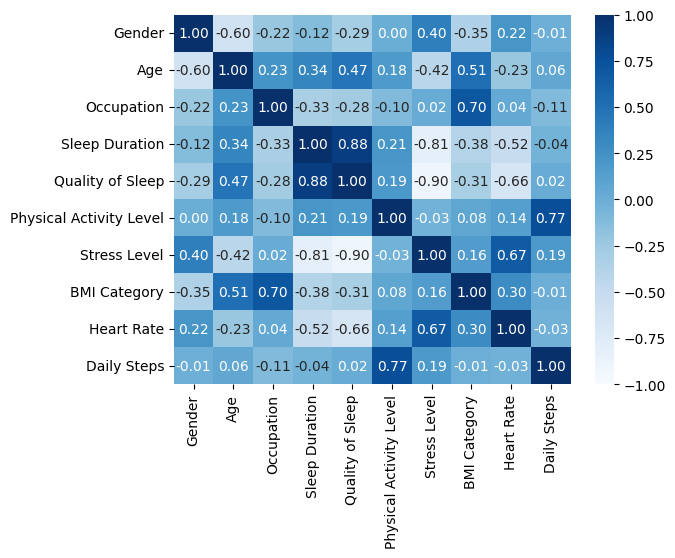

In [84]:
sns.heatmap(df.drop(columns = "Person ID", axis = 1).select_dtypes(include=np.number).corr(), annot=True, vmin=-1, fmt=".2f", cmap = "Blues")

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [35]:
enc = OrdinalEncoder()
X = df[["Gender", "Occupation", "BMI Category"]]
enc.fit(X)
df[["Gender", "Occupation", "BMI Category"]] = enc.transform(df[["Gender", "Occupation", "BMI Category"]])
enc.categories_
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1.0,27,9.0,6.1,6,42,6,3.0,126/83,77,4200,None
1,2,1.0,28,1.0,6.2,6,60,8,0.0,125/80,75,10000,None
2,3,1.0,28,1.0,6.2,6,60,8,0.0,125/80,75,10000,None
3,4,1.0,28,6.0,5.9,4,30,8,2.0,140/90,85,3000,Sleep Apnea
4,5,1.0,28,6.0,5.9,4,30,8,2.0,140/90,85,3000,Sleep Apnea


In [77]:
X = df.drop(["Person ID", "Sleep Disorder", "Blood Pressure"], axis = 1).values
y = df["Sleep Disorder"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Scaling the data using StandardScaler from scikit-learn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# Building a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

[[14  1  1]
 [ 3 40  0]
 [ 2  2 12]]


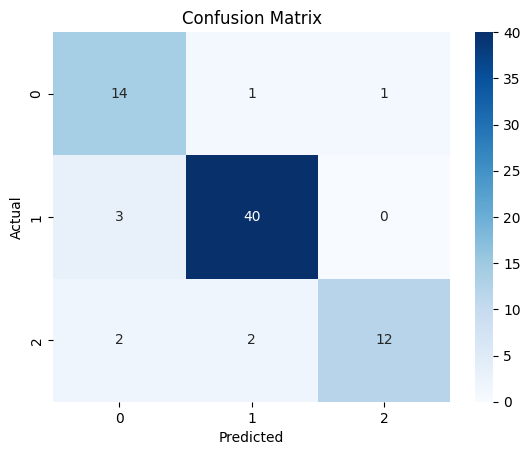

In [85]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Create heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [61]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Insomnia       0.74      0.88      0.80        16
        None       0.93      0.93      0.93        43
 Sleep Apnea       0.92      0.75      0.83        16

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.88      0.88        75



In [73]:
# Converting steps into pipeline
steps = [ ('scaler', StandardScaler()),  # Transformer for scaling data
    ('classifier', LogisticRegression())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

# Compute accuracy
pipeline.score(X_test, y_test)

0.8938053097345132

In [93]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),             
    ('classifier', RandomForestClassifier())   
])

# Support Vector Classifier pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('classifier', SVC())         
])

# Fitting and evaluating Random Forest Classifier
rf_pipeline.fit(X_train, y_train)
rf_score = rf_pipeline.score(X_test, y_test)
print("Random Forest Classifier Score:", rf_score)

# Fitting and evaluating Support Vector Classifier
svm_pipeline.fit(X_train, y_train)
svm_score = svm_pipeline.score(X_test, y_test)
print("Support Vector Classifier Score:", svm_score)

Random Forest Classifier Score: 0.88
Support Vector Classifier Score: 0.8533333333333334


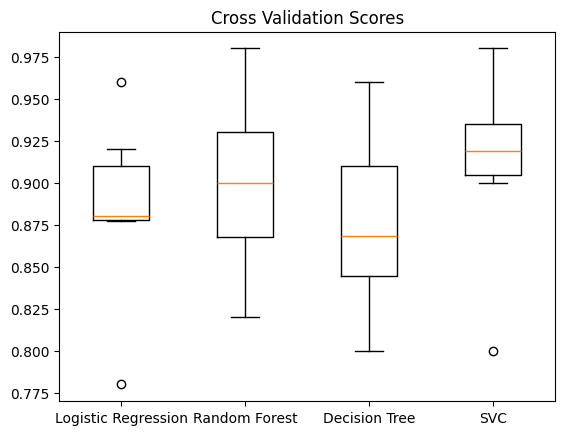

In [96]:
from sklearn.tree import DecisionTreeClassifier
models = {"Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
         "SVC": SVC(), }
# Empty list to store results
results = []

for model in models.values():
	kf = KFold(n_splits=6, random_state=42, shuffle=True)
	# Perform cross validation with model + training features + target training array
	cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
	results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.title("Cross Validation Scores")
plt.show()
# SVC has the best cross validation score